In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
# Local file path. Pl
df=pd.read_csv("CarPrice.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,four,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,six,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217,ohc,six,145,idi,3.0100,3.4000,23.0000,106,4800,26,27,22470.0000


In [76]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [77]:
#Showing only categorical features
df.select_dtypes(include="object").head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [78]:
#showing only numerical features
df.select_dtypes(include=['int','float']).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [17]:
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


(205, 26)

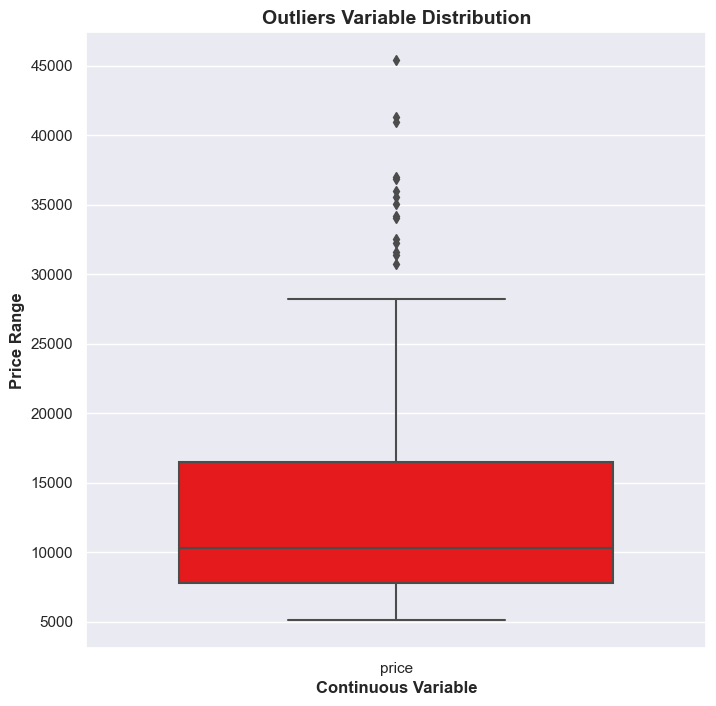

In [79]:
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

In [80]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [81]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})


In [82]:
df['symboling'] = df['symboling'].astype(str)


In [83]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]


Text(0, 0.5, 'Count of Cars')

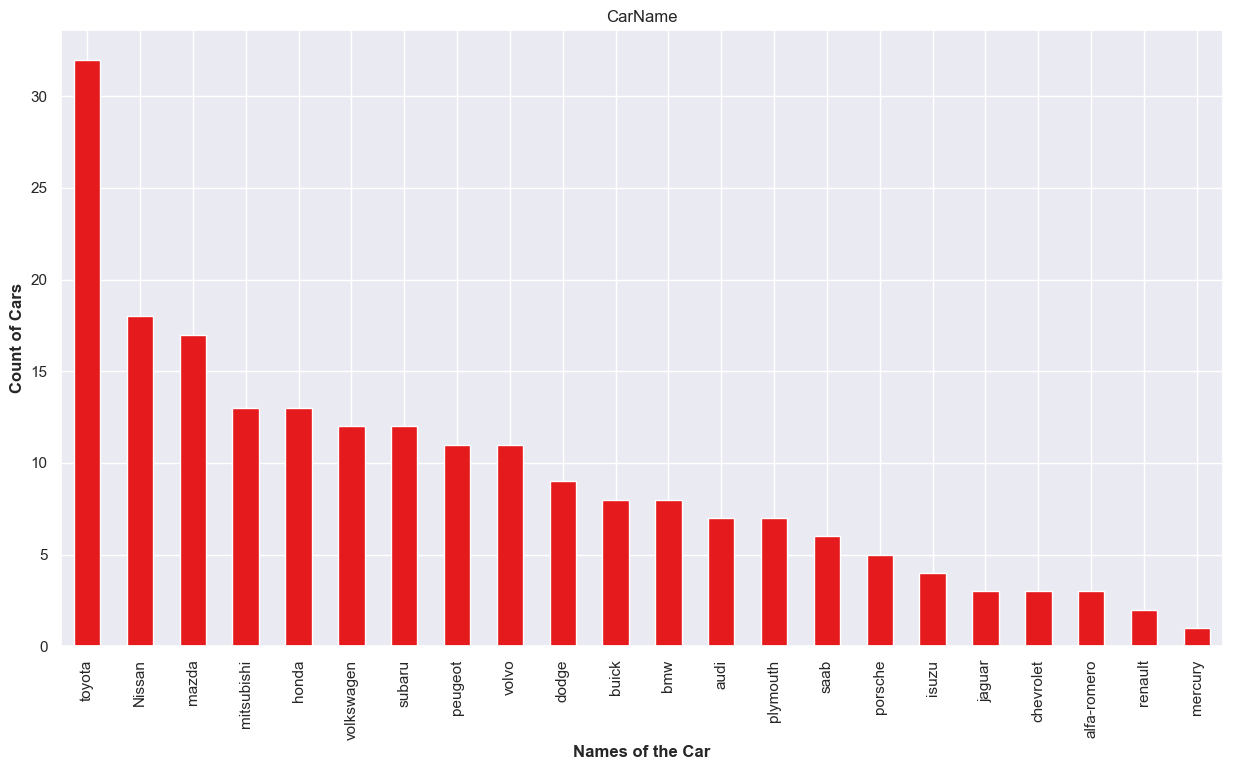

In [84]:
plt.rcParams['figure.figsize'] = [15,8]
ax=df['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

C:\Users\SI\AppData\Local\Temp\ipykernel_11520\37420077.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

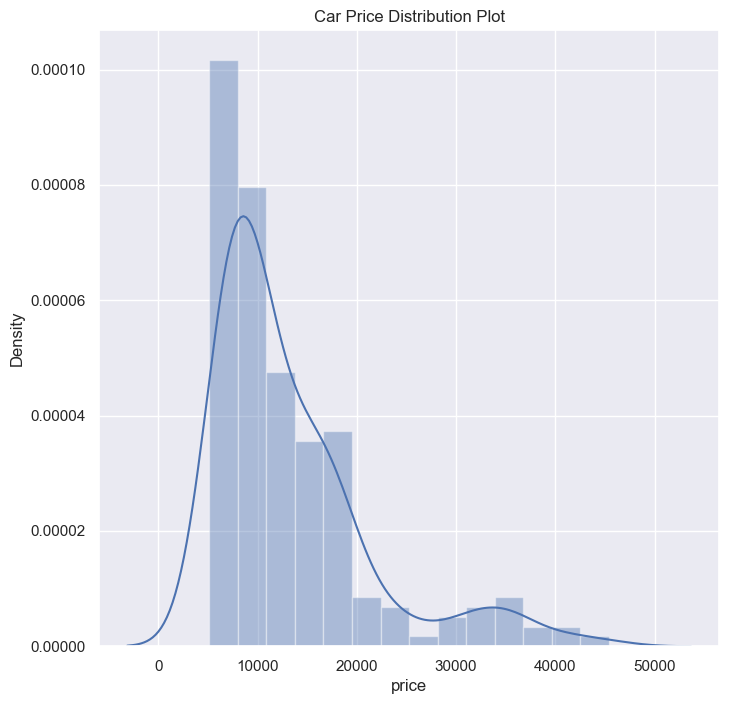

In [24]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

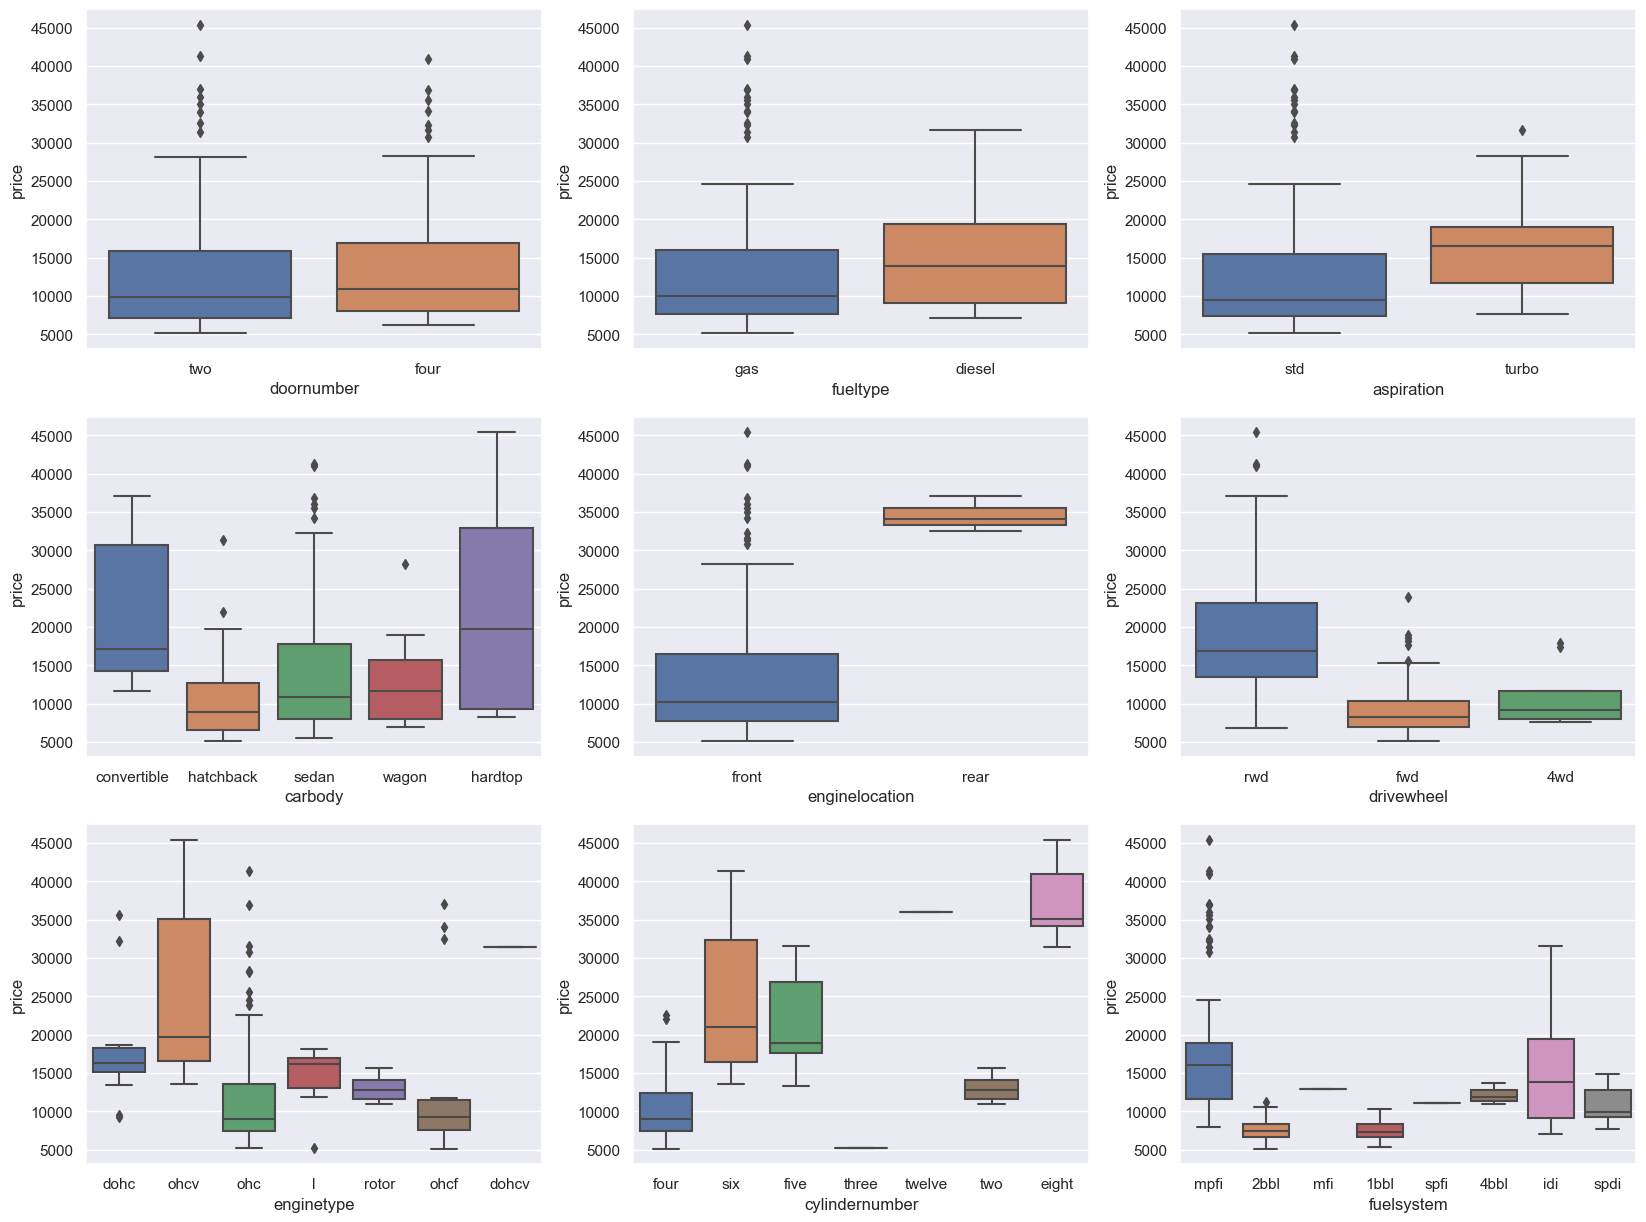

In [25]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency of Car Body')]

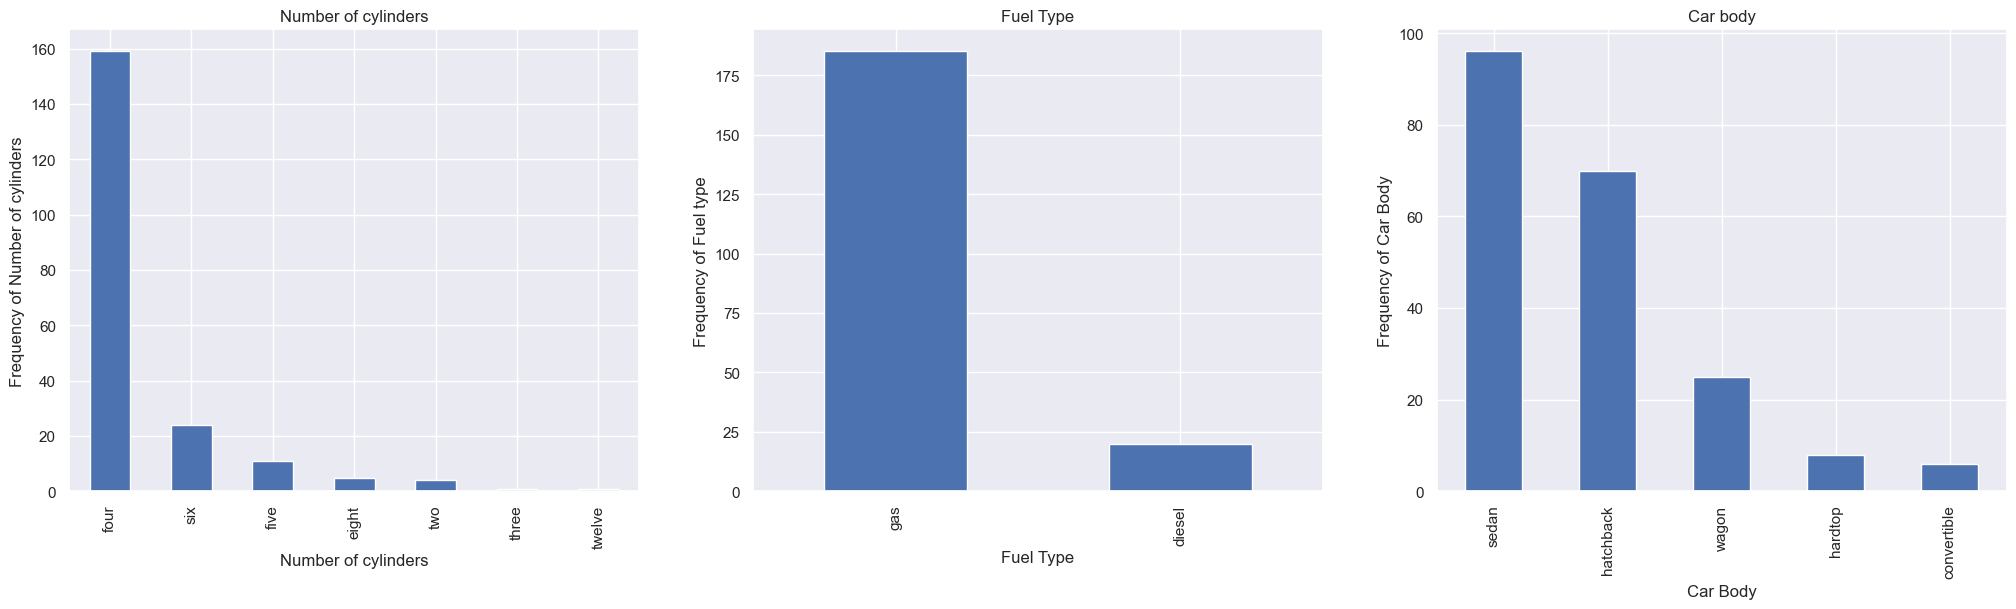

In [26]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

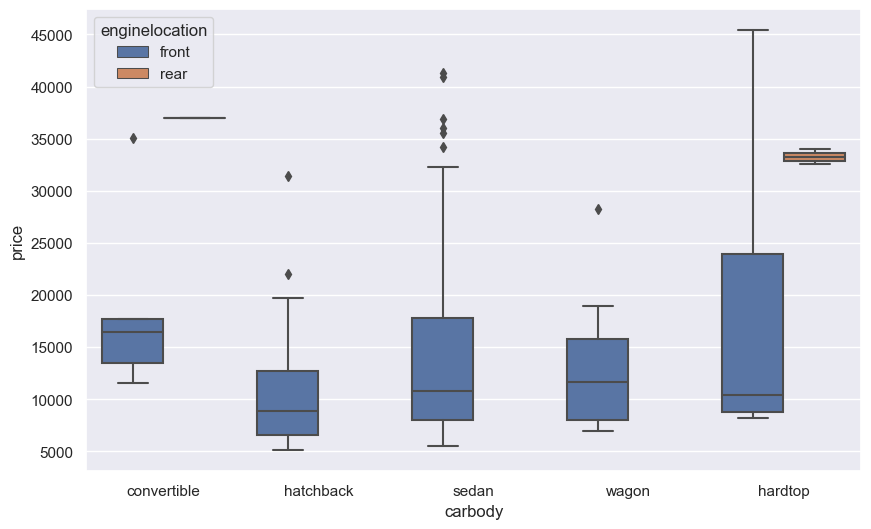

In [27]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

<Figure size 2000x600 with 0 Axes>

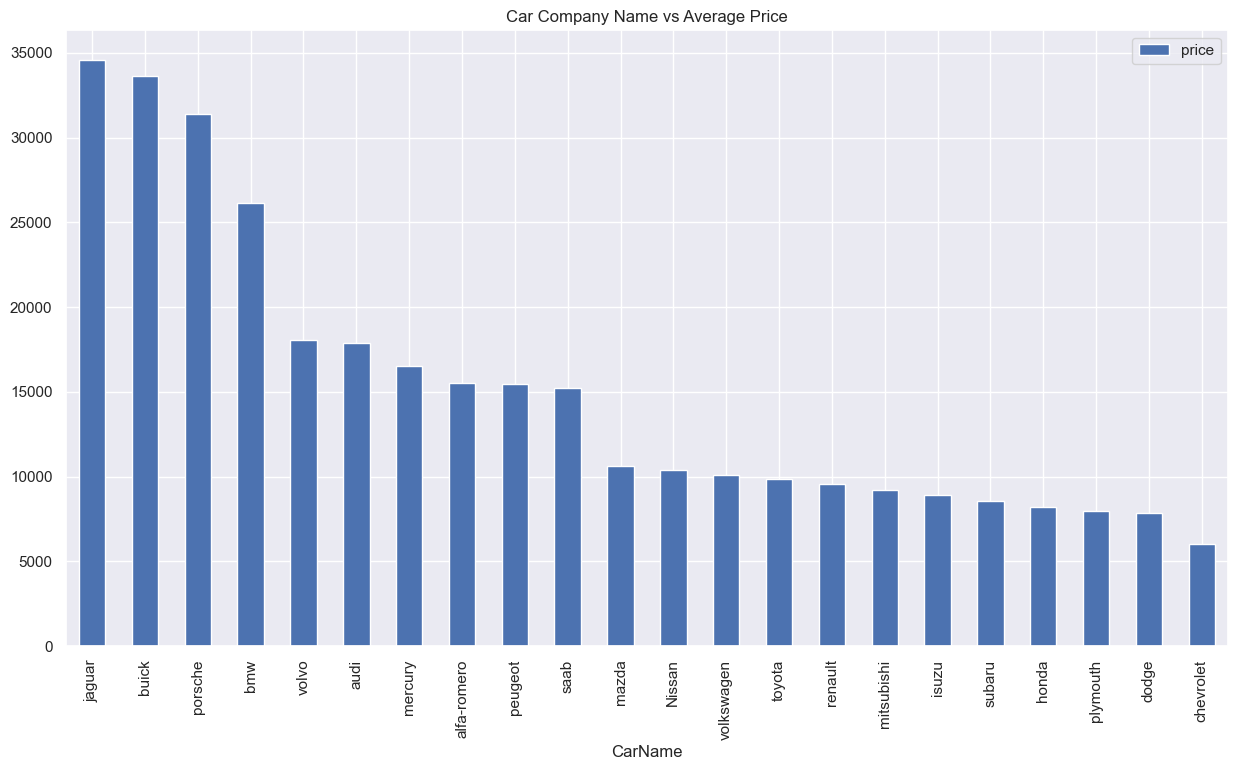

In [28]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [29]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

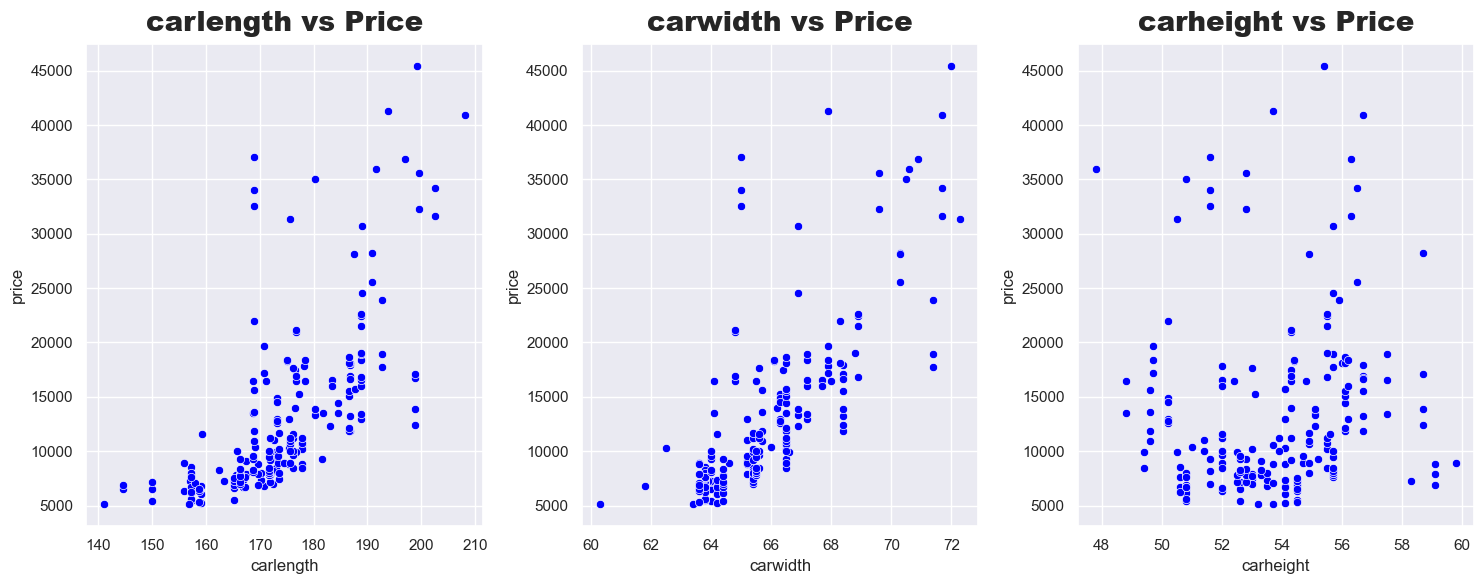

In [30]:
scatter_plot(["carlength","carwidth","carheight"])


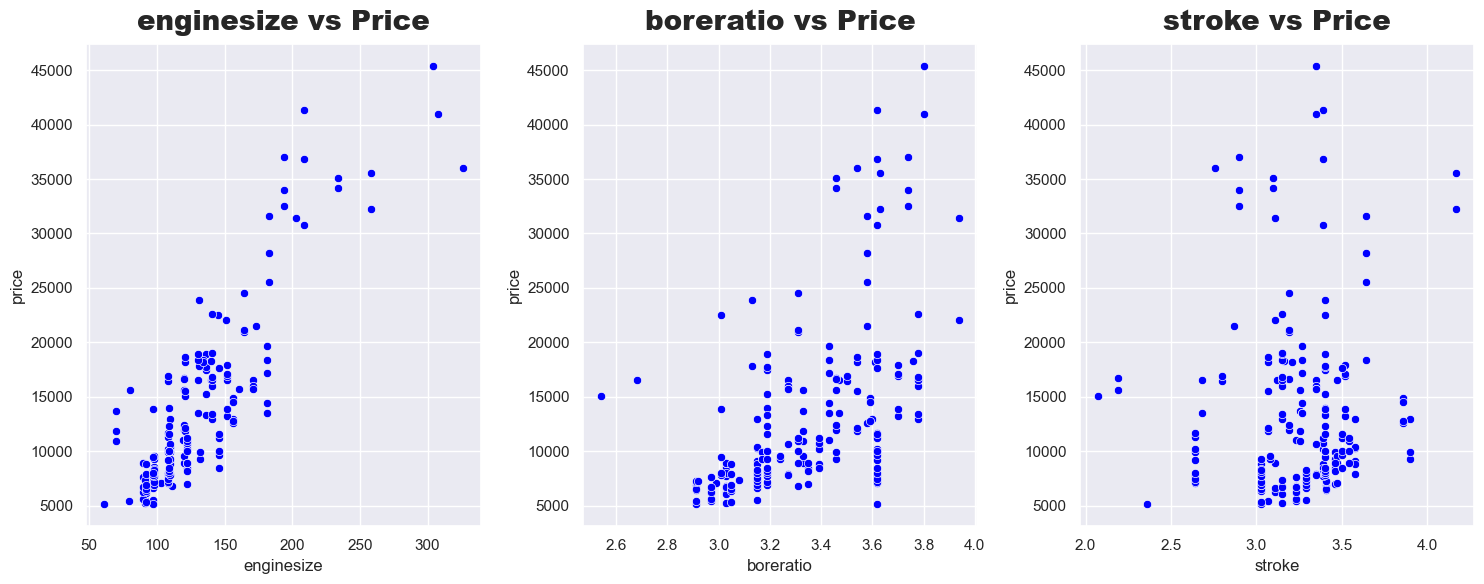

In [31]:
scatter_plot(["enginesize","boreratio","stroke"])

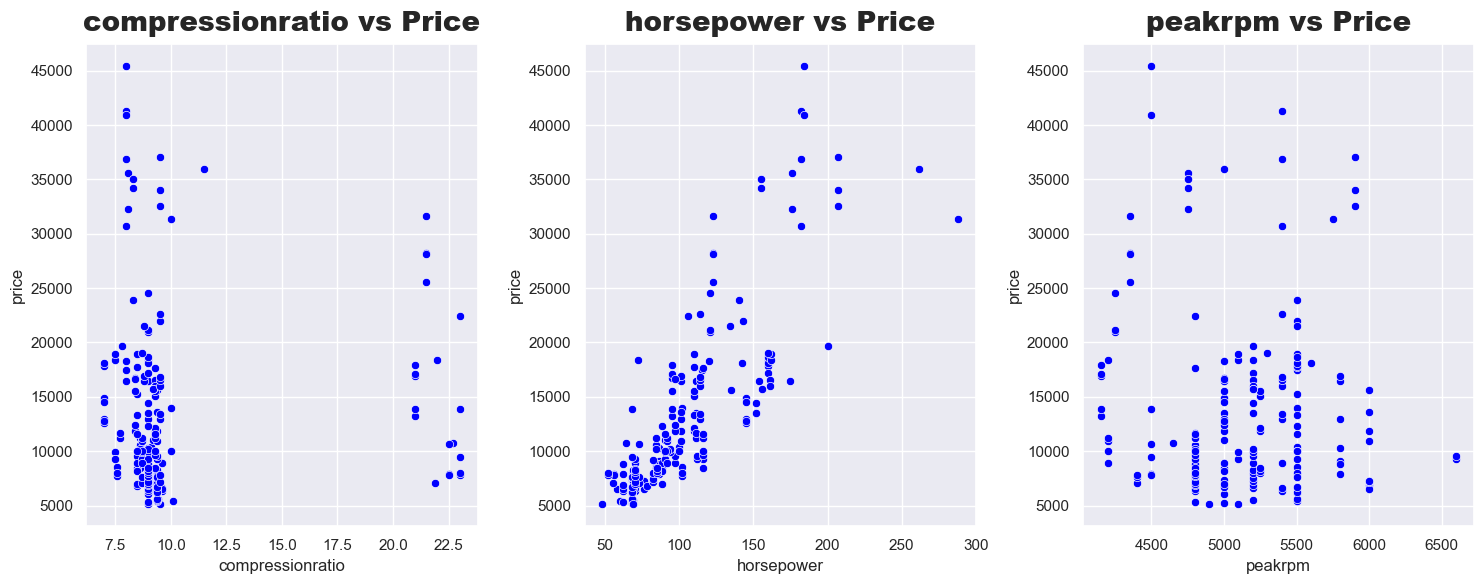

In [32]:
scatter_plot(["compressionratio","horsepower","peakrpm"])


In [33]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

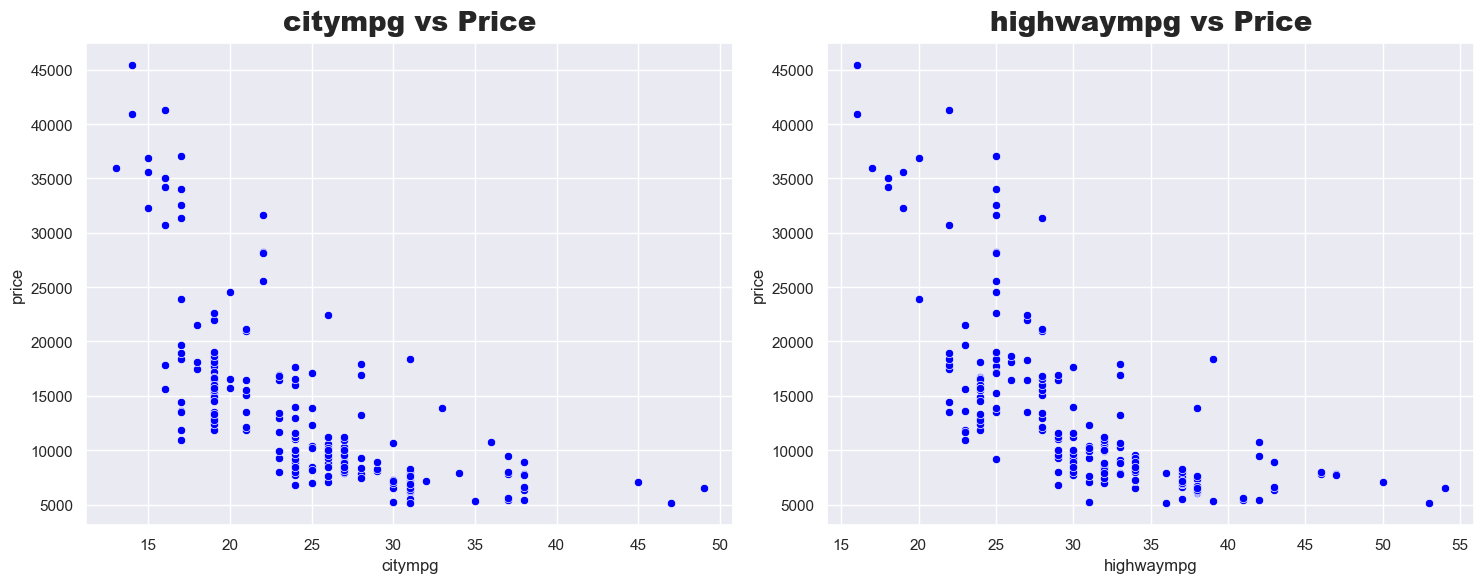

In [34]:
scatter_plot(["citympg","highwaympg"])


In [85]:
scaler = preprocessing.StandardScaler()


In [86]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','highwaympg','price']


C:\Users\SI\AppData\Local\Temp\ipykernel_11520\1707485601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), cmap="RdYlGn",annot=True)


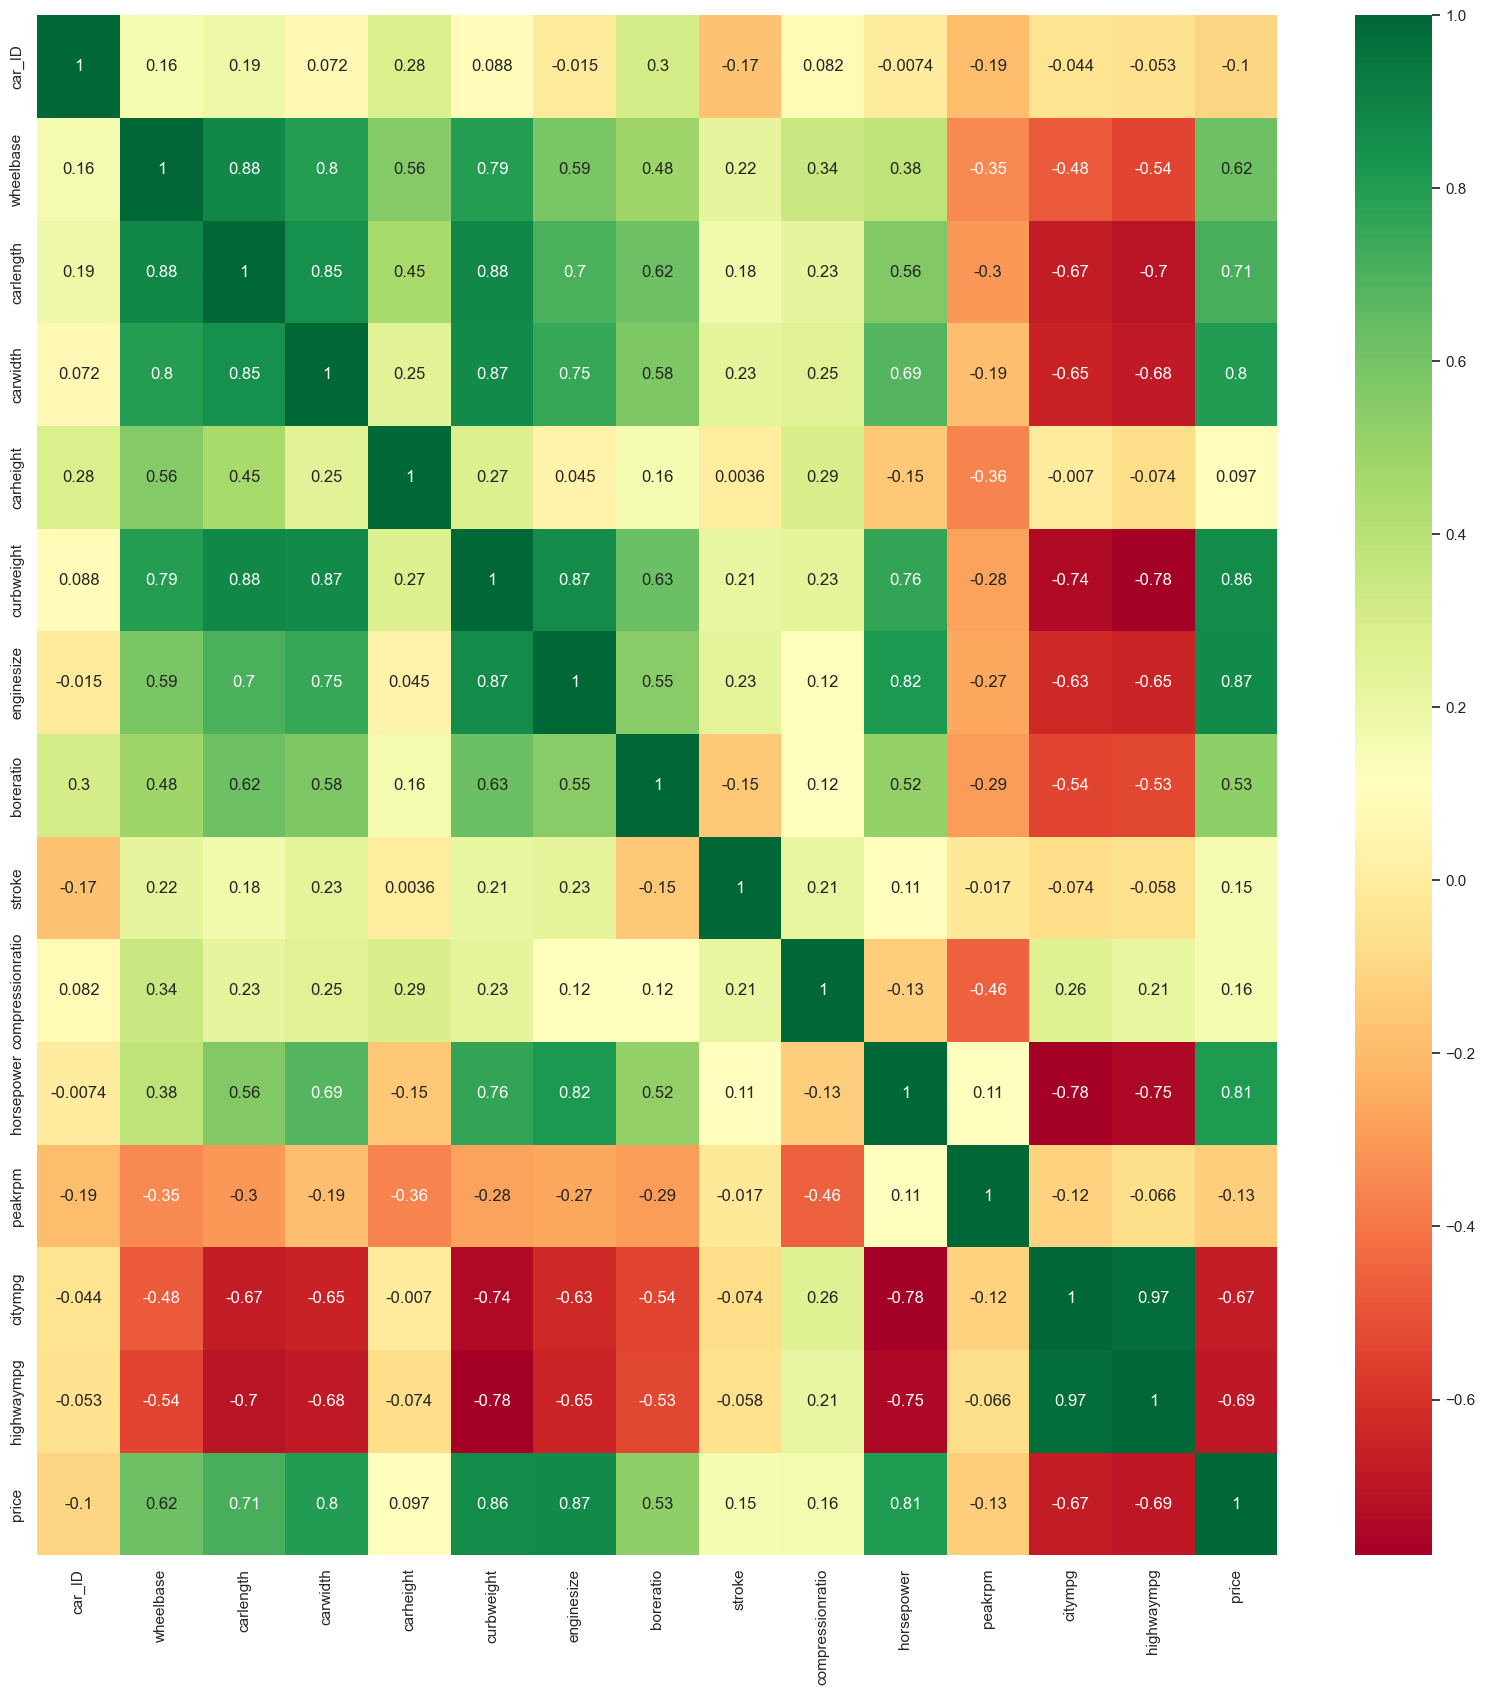

In [39]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn",annot=True)
plt.show()

In [87]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']


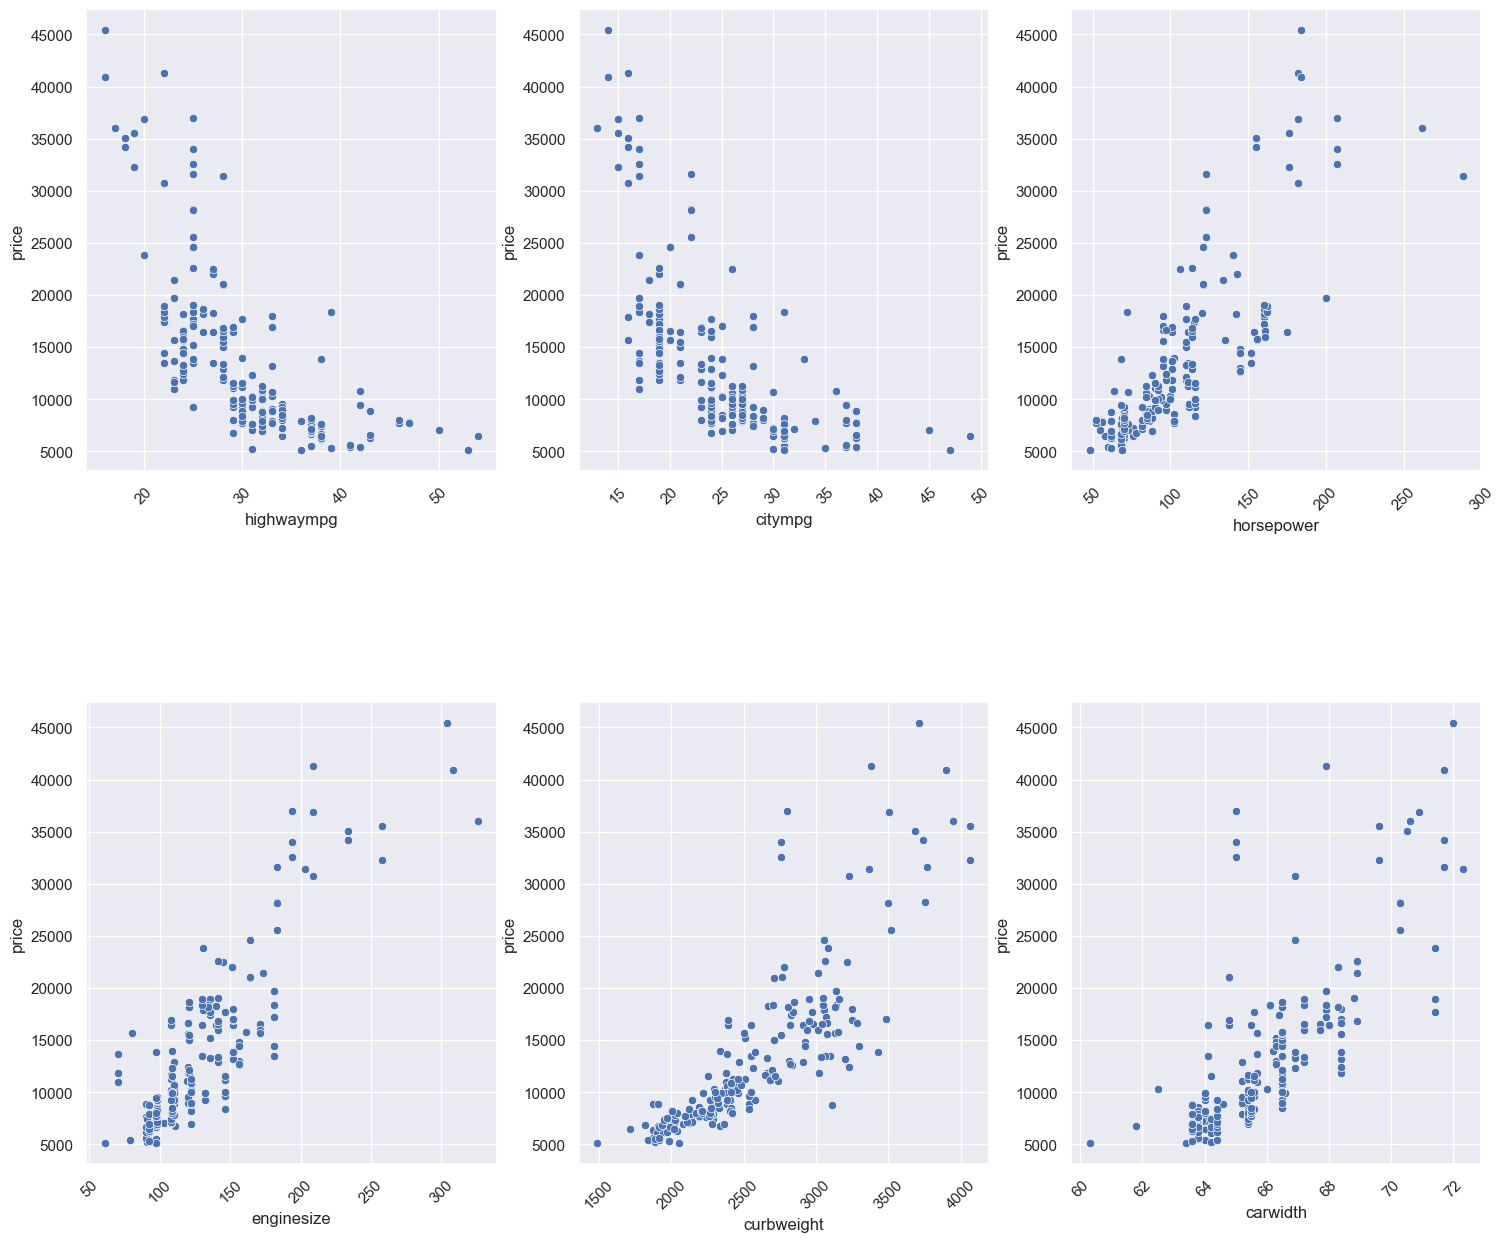

In [41]:
fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=df, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

In [88]:
df['price'] = df['price'].astype('int')
df_auto_temp = df.copy()
t = df_auto_temp.groupby(['CarName'])['price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range


In [89]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']
df = df[sig_col]

In [90]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']
dummies = pd.get_dummies(df[sig_cat_col], drop_first = True)
dummies.shape
df = pd.concat([df, dummies], axis = 1)


In [91]:
df.drop( sig_cat_col, axis = 1, inplace = True)
df.shape

(205, 32)

In [31]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [92]:
scaler = preprocessing.StandardScaler()
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df[sig_num_col] = scaler.fit_transform(df[sig_num_col])
df.head()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0.0274,-1.6908,-0.0146,0.0744,0.5191,0.1745,-0.6466,-0.5461,-0.4265,-0.8448,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.4045,-1.6908,-0.0146,0.0744,0.5191,0.1745,-0.6466,-0.5461,-0.4265,-0.8448,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.4045,-0.7086,0.5149,0.6040,-2.4049,1.2645,-0.9530,-0.6916,-0.2315,-0.1906,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,0.0845,0.1737,-0.4208,-0.4311,-0.5173,-0.0537,-0.1869,-0.1094,0.2073,0.1365,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0.5237,0.1071,0.5168,0.2189,-0.5173,0.2759,-1.1062,-1.2739,0.2073,0.2300,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [39]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [40]:
X_train_rfe = X_train[col_sup]


In [37]:
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           3.41e-68
Time:                        16:55:02   Log-Likelihood:                -6.1473
No. Observations:                 143   AIC:                             44.29
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
12,cylindernumber_four,15.9200
6,carbody_sedan,9.7300
0,curbweight,9.0600
2,carwidth,6.2400
5,carbody_hatchback,6.1500
9,enginetype_ohc,5.9700
1,horsepower,5.6100
13,cylindernumber_six,4.7300
7,carbody_wagon,3.4800
11,cylindernumber_five,2.8200


In [150]:
X_train_rfe1 = X_train_rfe.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           4.16e-69
Time:                        20:23:44   Log-Likelihood:                -6.5600
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.2700
0,curbweight,9.0600
6,carbody_sedan,9.0500
2,carwidth,6.1500
5,carbody_hatchback,5.9500
9,enginetype_ohc,5.9200
1,horsepower,4.6900
13,cylindernumber_six,3.7000
7,carbody_wagon,3.3100
11,cylindernumber_five,2.6600


In [151]:
X_train_rfe2 = X_train_rfe1.drop(['cylindernumber_six','carbody_hardtop'], 1,)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           6.73e-71
Time:                        20:23:49   Log-Likelihood:                -7.5979
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.5100
11,cylindernumber_four,8.0900
2,carwidth,5.6500
8,enginetype_ohc,5.6000
5,carbody_sedan,4.6400
1,horsepower,4.1700
4,carbody_hatchback,3.3100
6,carbody_wagon,2.2200
3,Cars_Category_TopNotch_Cars,2.0800
10,cylindernumber_five,1.9300


In [153]:
X_train_rfe3 = X_train_rfe2.drop(['enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_five'], 1,)

# Adding a constant variable and Build a third fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()
#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           8.26e-73
Time:                        20:23:57   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [154]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.1000
8,cylindernumber_four,5.6600
2,carwidth,5.0800
1,horsepower,3.8100
5,carbody_sedan,3.3500
4,carbody_hatchback,2.4700
6,carbody_wagon,1.8900
3,Cars_Category_TopNotch_Cars,1.8100
7,enginetype_dohcv,1.4900


Text(0.5, 0, 'Errors')

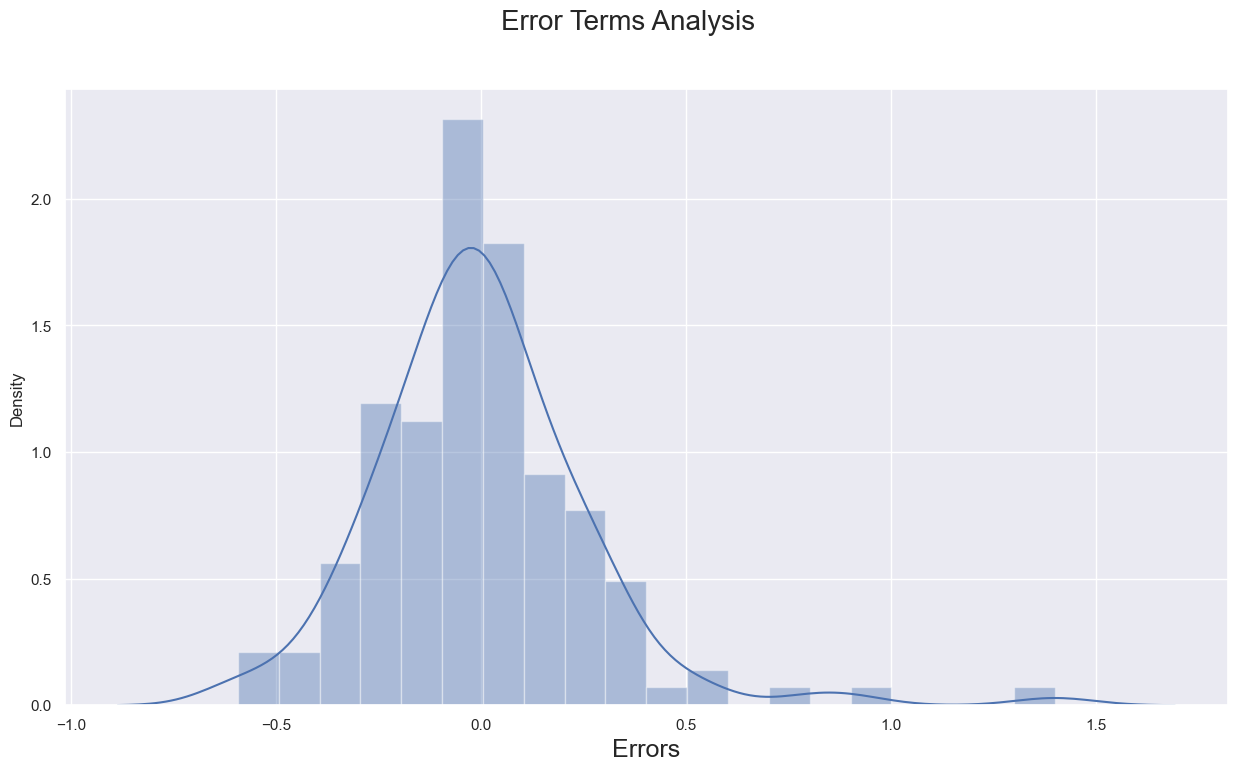

In [97]:
y_train_price = lm_rfe3.predict(X_train_rfe3c)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [155]:
X_train_rfe4 = X_train_rfe3.drop('curbweight', 1,)

# Adding a constant variable and Build a third fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()
#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           4.86e-71
Time:                        20:24:08   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [156]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.6600
4,carbody_sedan,3.3500
0,horsepower,2.7200
3,carbody_hatchback,2.4000
1,carwidth,2.2200
2,Cars_Category_TopNotch_Cars,1.7300
5,carbody_wagon,1.7100
6,enginetype_dohcv,1.2400


In [160]:
X_train_rfe5 = X_train_rfe4.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           4.70e-70
Time:                        20:29:10   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [161]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.4500
1,carwidth,2.1200
2,Cars_Category_TopNotch_Cars,1.7000
4,carbody_sedan,1.2200
6,enginetype_dohcv,1.2200
3,carbody_hatchback,1.1000
5,carbody_wagon,1.0200


Text(0.5, 0, 'Errors')

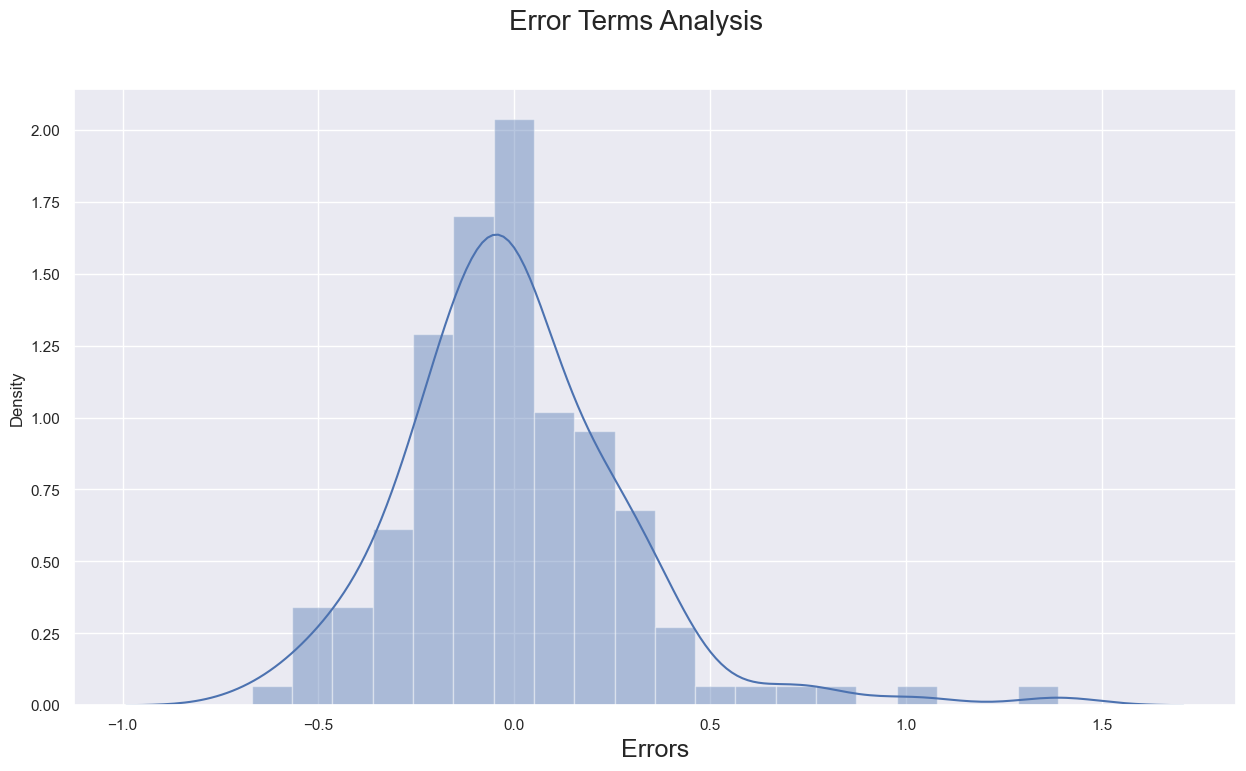

In [163]:
y_train_price = lm_rfe5.predict(X_train_rfe5c)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

In [172]:
y_test1 = df_test1.pop('price')
X_test_1 = sm.add_constant(X_test)

# Select only the columns used during training
X_test_new = X_test_1[X_train_rfe5c.columns]  # Ensure these columns match the training set

# Make predictions using the final model
y_pred = lm_rfe5.predict(X_test_new)





In [173]:
r2_score(y_test1, y_pred)


-2.685873283933054

In [ ]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','highwaympg','price']


In [ ]:
training_score = []
testing_score = []
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

In [ ]:
model_prediction(LinearRegression())


In [93]:
X = df.drop(columns="price")           
y = df["price"]    # y = price

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (143, 31)
X Test  :  (62, 31)
Y Train :  (143,)
Y Test  :  (62,)


In [94]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()

# make for loop for Regression 

li = [LR,DTR,RFR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 85.69301044685777
DecisionTreeRegressor() : 91.37753144202433
RandomForestRegressor() : 93.70996274409652
